### Opis problemu
W ramach tego projektu utworzono i wytrenowano prostą sieć neuronową, która będzie zdolna do rozpoznawania ręcznie pisanych cyfr. Jest to klasyczny problem w dziedzinie uczenia maszynowego. Dane treningowe i testowe pochodzą ze zbioru danych MNIST biblioteki keras.

In [ ]:
# Import bibliotek
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

### Wczytanie danych

In [ ]:
# wcytanie danych mnist oraz podział na zbiory treningowe i testowe
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Eksploracja danych

In [ ]:
# Wyświetl statystyki zbiorów
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print("Liczba danych treningowych X_train: ", X_train.shape[0])
print("Liczba danych testowych X_test: ", X_test.shape[1])
print("Wielkość jednego obrazka: ", X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych X_train:  60000
Liczba danych testowych X_test:  28
Wielkość jednego obrazka:  (28, 28)


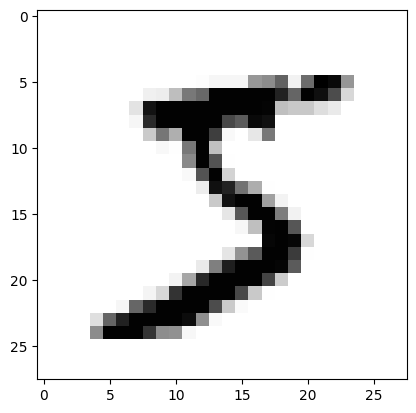

In [ ]:
# Wyświetlenie przykładowego obrazu
plt.imshow(X_train[0], cmap="Greys")

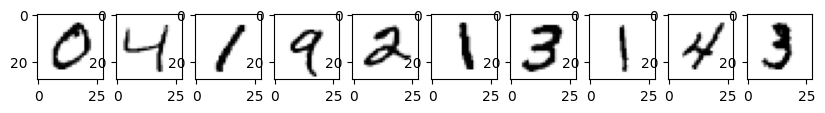

In [ ]:
# Wyświetl 10 przykładowych obrazów
plt.figure(figsize=(10,10))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_train[i], cmap="Greys")

### Przygotowanie danych

In [ ]:
# Przekształcenie danych
# Dane wejściowe do sieci będą 1 wymiarowym wektorem
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Zmiana typu danych
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
# Skalowanie danych. Sieć neuronowa lepiej sobie radzi z danymi znormalizowanymi
X_train = X_train / 255
X_test = X_test / 255

### Etykiety

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

# Konwersja etykiet
# 10 to liczba klas. W tym przypadku to liczby od 0 do 9
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Liczba 1 w tym przypadku reprezentuje cyfrę 0
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Budowa modelu

In [ ]:
# Tworzenie prostej sieci neuronowej
# Tworzenie instancji klasy Sequential
model = Sequential()

# Do obiektu dodajemy wartwy
# Sieć gęsta = Dense
# Funkcja aktywacji sprawia, że model staje się nieliniowy
# Zastosowano ReLu - zeruje wartości ujemne
# 28,28 - > rozmiar danych wejściowych

# pierwsza warstwa/wejściowa
model.add(Dense(units=512, activation="relu", input_shape=(28*28,)))
 # warstwa ukryta
model.add(Dense(units=512, activation="relu"))
# units=10 - > liczba neuronów / warstwa wyjściowa
model.add(Dense(units=1, activation="softmax"))

# Podsumowanie modelu/informacje
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Kompilowanie modelu
model.compile(optimizer=RMSprop(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Trenowanie modelu sieci

In [ ]:
# Trenowanie sieci. W zmiennej history przechowujemy historię trenowania.
# Funkcja model.fit() zwróci obiekt history, który zawiera informacje o trenowaniu.
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 20s 37ms/step - loss: 0.2165 - accuracy: 0.9339 - val_loss: 0.0951 - val_accuracy: 0.9704
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0528 - accuracy: 0.9842 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0769 - val_accuracy: 0.9799
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0820 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.1075 - val_accuracy: 0.9790
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0918 - val_accuracy: 0.980

In [ ]:
# Ocena modelu na danych testowych
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1457 - accuracy: 0.9839


[0.14568006992340088, 0.9839000105857849]

In [ ]:
def wykres_dokladnosci(history):
    """
    Funkcja rysuje dokładność sieci podczas treningu
    oraz na zbiorze walidacyjnym
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()

    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10,6))
    plt.plot(epochs, acc, label="Dokładność na zbiorze treningwym", linestyle="-", marker="o")
    plt.plot(epochs, val_acc, label="Dokładność na zbiorze testowym", marker="o")
    plt.title("Wykres dokładności")
    plt.xlabel("Epoki")
    plt.ylabel("Dokładność")
    plt.legend()
    plt.show()

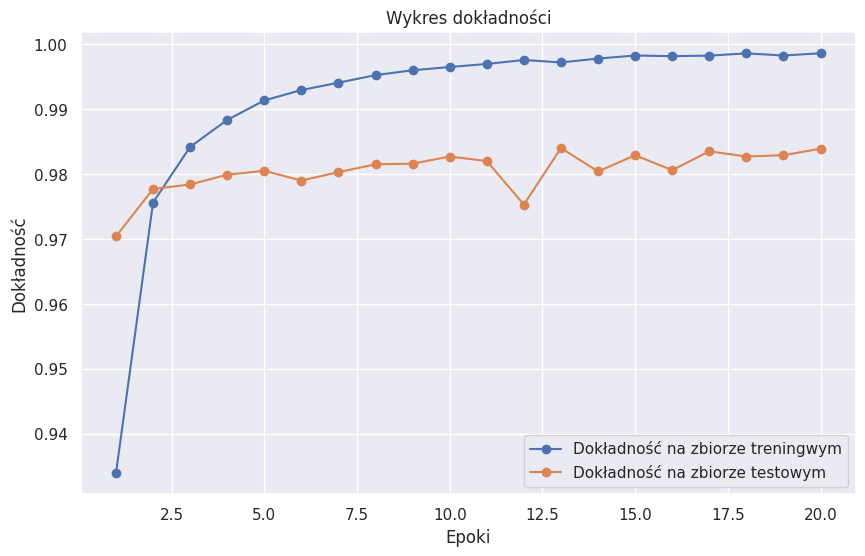

In [ ]:
wykres_dokladnosci(history)

In [ ]:
def wykres_straty(history):
    """
    Funkcja rysuje stratę podczas etapu trenowania
    oraz na zbiorze walidacyjnym
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10,6))
    plt.plot(epochs, loss, label="Strata na zbiorze treningwym", marker="o")
    plt.plot(epochs, val_loss, label="Strata na zbiorze testowym", marker="o")
    plt.title("Wykres strat")
    plt.xlabel("Epoki")
    plt.ylabel("Strata")
    plt.legend()
    plt.show()

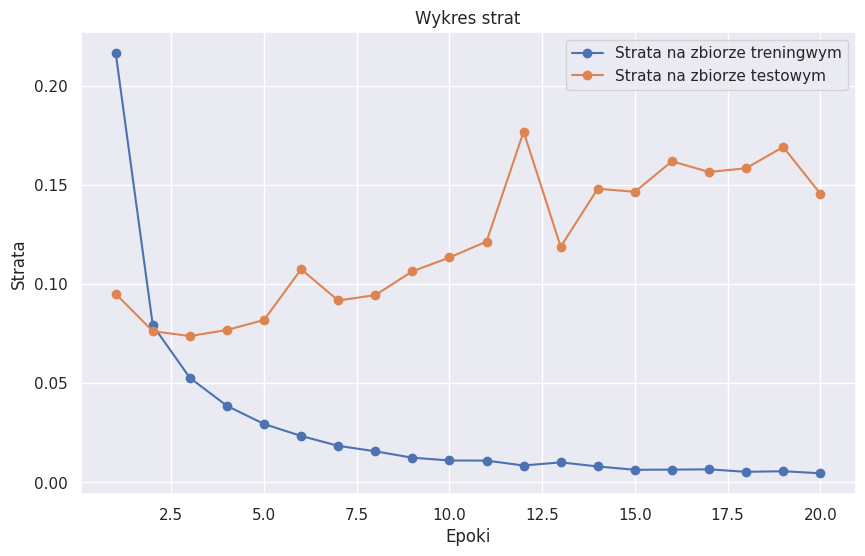

In [ ]:
wykres_straty(history)

### Wniosek
Po około 3 epoce, powinniśmy przerwać proces uczenia, ponieważ im dłużej trenujeny tym funkcja straty rośnie na zbiorze testowym. Model zaczyna nadmiernie dopasowywać się do danych treningowych i zachodzi zjawisko overfittingu.